$\textbf{Численное решение задачи Колмогорова-Петровского-Пискунова (КПП)}$

Проект по вычислительной математике 6 семестра ЛФИ 2025 года

Выполнили студенты группы Б02-205 Анастасия Иванова, Чачава Георгий, Хомяков Никита, Вовк Павел

$\textbf{Решение в переменных бегущей волны. Фазовый портрет, особые точки}$

$\displaystyle \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + au(1-u) \qquad u(x \rightarrow -\infty) = 1, u(x \rightarrow +\infty) = 0 $ \
$u(t=0) =  \left\{\begin{array}{@{}l@{}}
    1, x \le 0\\
    0, x> 0
  \end{array}\right.$

I. Введём переменную бегущей волны: $\; \xi = vt - x$, где $v>0$ – скорость, неизвестный параметр.\
После замены переменного получаем уравнение: $\; v \cdot u_{\xi} = u_{\xi\xi} + au(u - 1)$\
Введём $\; p = u_{\xi} = \dot{u}$, откуда получаем систему: \
$\left\{\begin{array}{@{}l@{}}
    \dot{u} = p\\
    \dot{p} = vp - au(1 - u)
  \end{array}\right.$

Найдём особые точки системы:\
$\left\{\begin{array}{@{}l@{}}
    p = 0\\
    vp - au(1 - u) = 0
  \end{array}\right. \; \Rightarrow \text{точки (0,0) и (1,0)}$

II. Исследуем точку (0,0):\
Линеаризация в окрестности особой точки: $\left\{\begin{array}{@{}l@{}}
    \dot{u} = p\\
    \dot{p} = vp - au
  \end{array}\right. \Longrightarrow$ $\begin{vmatrix}
-\lambda & 1 \\
-a & v - \lambda
\end{vmatrix} = 0$ \
Отсюда $\; \displaystyle \lambda_{1,2} = \frac{v \pm \sqrt{v^2 - 4a}}{2}$

II(a). При $v = 2\sqrt{a}$: действительные совпадающие положительные корни, тип фазовой траектории – неустойчивый дикритический узел.\
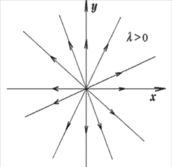

II(b). При $v < 2\sqrt{a}$: комплексные корни с положительной действительной частью, тип фазовой траектории – неустойчивый фокус.\
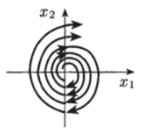 \
По физическому смыслу задачи $u$ не может принимать отрицательные значения, а здесь все траектории имеют участки, в которых $u$ отрицательно, так что это решение нам не подходит.

II(c). При $v > 2\sqrt{a}$: действительные положительные корни, тип фазовой траектории – неустойчивый узел.\
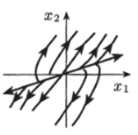

Найдём собственные векторы:\
\
$\begin{pmatrix}
-\lambda_1 & 1 \\
-a & v - \lambda_1
\end{pmatrix}$ $\cdot$ $\begin{pmatrix}
h_1^1 \\
h_1^2
\end{pmatrix} = 0$ $\quad \Longrightarrow \quad$ $h_1 = $ $\begin{pmatrix}
1 \\
\lambda_1
\end{pmatrix}$ \
\
Аналогично $h_2 = $ $\begin{pmatrix}
1 \\
\lambda_2
\end{pmatrix}$

III. Исследуем точку (1,0):\
Линеаризация в окрестности особой точки (замена $u \rightarrow u - 1; \; p \rightarrow p - 1$): $\left\{\begin{array}{@{}l@{}}
    \dot{u} = p\\
    \dot{p} = vp + au
  \end{array}\right. \Longrightarrow$ $\begin{vmatrix}
-\lambda & 1 \\
a & v - \lambda
\end{vmatrix} = 0$ \
Отсюда $\; \displaystyle \lambda_{1,2} = \frac{v \pm \sqrt{v^2 + 4a}}{2}$

Собственные числа вещественны для любых значений $v$, причём $\lambda_1 > 0$, $\lambda_2 < 0$. Тип фазовой траектории – седло.\
Собственные векторы: $h_1 = $ $\begin{pmatrix}
1 \\
\lambda_1
\end{pmatrix}$, $h_2 = $ $\begin{pmatrix}
1 \\
\lambda_2
\end{pmatrix}$ \
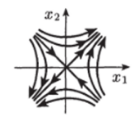

Таким образом, искомое решение – траектория на фазовой плоскости $(u, \dot{u})$, выходящая из точки (0,0) и входящая в точку (1,0).

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

INF = 10000

In [34]:
def f(ksi, w, a, v):
    u, p = w[0], w[1]
    return np.array([-p, -v*p + a*u*(1 - u)])

In [35]:
def rk4(f, tmin, tmax, tau, u0, args, flag=False):
    c2, a21, c3, a31, a32, c4, a41, a42, a43, b1, b2, b3, b4 = 1/2, 1/2, 1/2, 0, 1/2, 1, 0, 0, 1, 1/6, 2/6, 2/6, 1/6
    t = np.arange(tmin, tmax, tau)
    n = len(t)
    u = np.zeros((n, len(u0)))
    u[0] = u0
    for i in range(0, n-1):
        k1 = f(t[i], u[i], *args)
        k2 = f(t[i] + c2*tau, u[i] + a21*tau*k1, *args)
        k3 = f(t[i] + c3*tau, u[i] + a31*tau*k1 + a32*tau*k2, *args)
        k4 = f(t[i] + c4*tau, u[i] + a41*tau*k1 + a42*tau*k2 + a43*tau*k3, *args)
        u[i+1] = u[i] + tau*(b1*k1 + b2*k2 + b3*k3 + b4*k4)
        if flag and np.abs(u[i+1][0]) < np.abs(1 - u0[0]):
            y = np.array([u[j][0] for j in range(n)])
            p = [u[j][1] for j in range(n)]
            t = t
            y = y[:np.where(y==0.0)[0][0]]
            p = p[:len(y)]
            t = t[:len(y)]
            return (t, y, p)
    y = [u[j][0] for j in range(n)]
    v = [u[j][1] for j in range(n)]
    return (t, y, v)

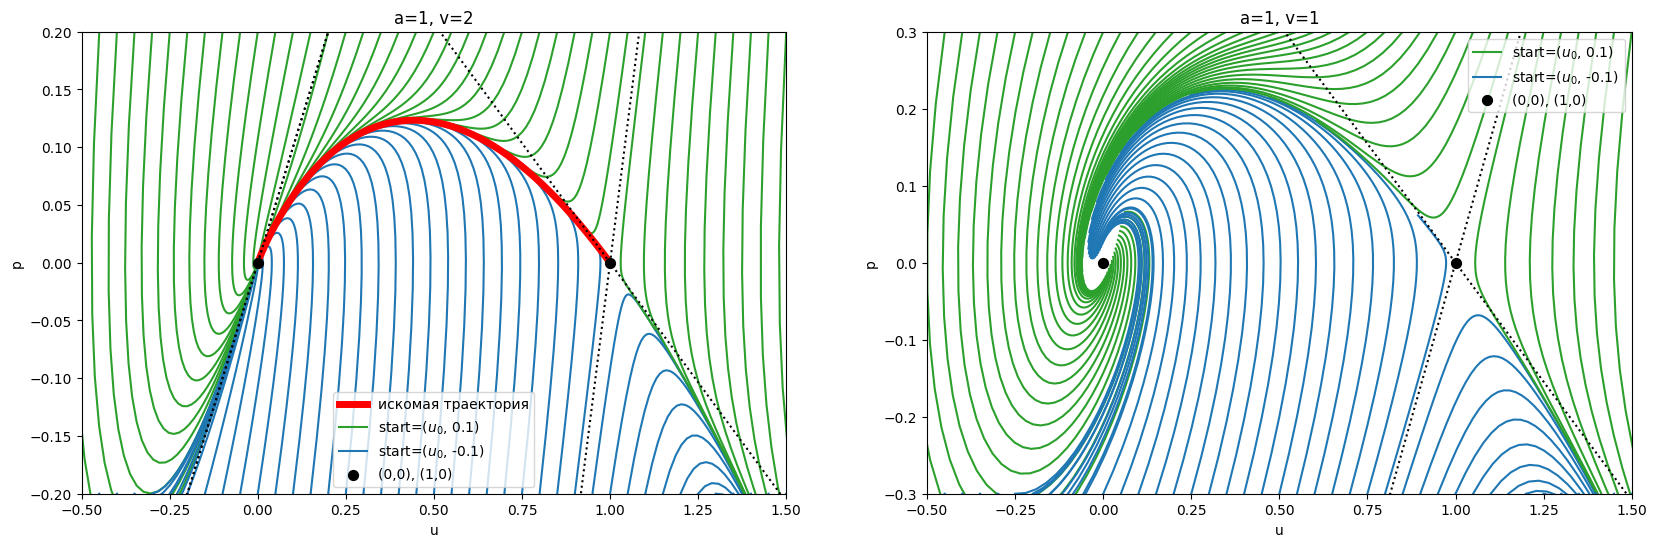

In [36]:
a = 1

def flux_plot(v, ax, ylim):
    u_ = np.arange(-0.5, 1.55, 0.05)
    for u0 in np.arange(-0.5, 1.55, 0.05):
        s1, s2 = "", ""
        if u0 == -0.5:
            s1, s2 = "start=($u_0$, 0.1)", "start=($u_0$, -0.1)"
        t, u, p = rk4(f, tmin = -1, tmax = 4, tau = 0.1, u0=(u0, ylim), args=(a, v))
        ax.plot(u, p, color = "tab:green", label = s1, zorder = 0)
        t, u, p = rk4(f, tmin = -1, tmax = 4, tau = 0.1, u0=(u0, -ylim), args=(a, v))
        ax.plot(u, p, color = "tab:blue", label = s2, zorder = 0)
    ax.set_ylim(-ylim, ylim)
    ax.set_xlim(-0.5, 1.5)
    ax.scatter(0, 0, color="black", s=50, zorder = 2, label = "(0,0), (1,0)")
    ax.scatter(1, 0, color="black", s=50, zorder = 2)
    ax.set_xlabel("u")
    ax.set_ylabel("p")
    ax.set_title("a="+str(a)+", v="+str(v))
    ax.legend()

    ax.plot(u_, -(-v + np.sqrt(v**2 - 4*a)) / 2 * u_, linestyle=":", color="black")
    ax.plot(u_, -(-v - np.sqrt(v**2 - 4*a)) / 2 * u_, linestyle=":", color="black")
    ax.plot(u_, -(-v + np.sqrt(v**2 + 4*a)) / 2 * (u_ - 1), linestyle=":", color="black")
    ax.plot(u_, -(-v - np.sqrt(v**2 + 4*a)) / 2 * (u_ - 1), linestyle=":", color="black")

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ksi, u_ksi, p_ksi = rk4(f, tmin = -INF, tmax = INF, tau = 0.1, u0 = (0.9999999,0), args=(1,2), flag = True)
ax.plot(u_ksi, p_ksi, color="red", lw = 5, zorder = 1, label="искомая траектория")
flux_plot(2, ax, 0.2)
ax1 = fig.add_subplot(122)
flux_plot(1, ax1, 0.3)

На графиках выше показаны фазовые портреты системы при $v \ge 2\sqrt{a}$ и $v < 2\sqrt{a}$. Зелёные решения "стартуют" из $p = 0.1$, синие – из $p = -0.1$

$\textbf{Решение с помощью явной схемы}$

$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}+au(1-u)$

1)Явная схема:
$\frac{u_m^{n+1}-u_m^{n}}{\tau} = \frac{u_{m+1}^{n}-2u_m^{n}+u_{m-1}^{n}}{h}+au_m^{n}(1-u_m^{n})$

Будем искать решение на любом следующем слое в виде:
$u_m^{n+1} = u_m^{n}+\frac{\tau}{h^2}(u_{m+1}^n-2u_m^{n}+y_{m-1}^{n})+a\tau u_m^{n}(1-u_m^{n})$

2)Т.к. схема явная, то для устойчивости необходимо выбирать $\tau$ и h так, чтобы $\sigma = \frac{\tau}{h^2} < 0,5$.

3)Начальные и граничные условия:
$u(-\infty,t) = 1$, $u(+\infty,t) = 0$. Ограничим задачу на отрезок $[L_o,L]$, $L = L_0+Mh$. Тогда:
$u_0^{n} = 1, u_M^{n} = 0$
Начальные условия: $u(x,0) = 1$, если $x\leq 0 $ и $u(x,0) = 0$, если $x > 0$

$u_m^0 = 1, L_0+mh \leq 0$

$u_m^0 = 0, L_0 +mh >0$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib import axes
import scipy
from scipy import integrate
from scipy import interpolate
from scipy import misc

In [10]:
#Начальные и граничные условия, параметры задачи
def u0(x):
    return x < 0

a = 1
u_left = 1
u_right = 0

In [85]:
#Построение 3d графика решения и проекций решения на x и t
def u_plot(t, x, u, s):
    x_, t_ = np.meshgrid(x, t)
    fig = plt.figure(figsize = (20, 6))
    gs2 = gridspec.GridSpec(3, 3)
    
    ax = fig.add_subplot(gs2[:, :1], projection='3d')
    ax.plot_wireframe(x_, t_, u)
    
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("u")
    ax.set_title(s)
    ax.set_zlim(0, 1.1)
    
    ax1 = fig.add_subplot(gs2[:2, -2])
    for n in range(len(t)):
        if n % (len(t) // 20 + 1) ==0:
            ax1.plot(x, u[n], label = f"t={t[n]:.2f}")
            ax1.set_xlabel("x")
            ax1.set_ylabel("u")
            ax1.legend()
        
    ax2= fig.add_subplot(gs2[:2, -1])
    for m in range(len(x)):
        if m % (len(x) // 80 + 1) == 0:
            ax2.plot(t, u[:, m], label = f"x={x[m]:.2f}")
            ax2.set_xlabel("t")
            ax2.set_ylabel("u")
            ax2.legend(bbox_to_anchor=(1, 1), ncol=3)
        
    plt.show()
    return

In [84]:
#реализация явной схемы (начальное условие заложено в функции)
def explicit(T, tau, L_left, L_right, h, u_left=u_left, u_right=u_right, u0=u0):
    s = f"Curant = {tau / h**2}, \u03c4 = {tau}, h = {h}"
    t = np.arange(0, T+tau, tau)
    x = np.arange(L_left, L_right+h, h)
    
    N = len(x)
    M = len(t)
    u = np.zeros(M*N).reshape(M, N)
    
    #начальные и граничные условия
    u[0] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right
    
    for m in range(0, M-1):
        for n in range(1, N-1):
            u[m+1][n] = u[m][n] + (tau/h**2)*(u[m][n+1]-2*u[m][n]+u[m][n-1])+a*tau*u[m][n]*(1-u[m][n])
    return (t, x, u, s)

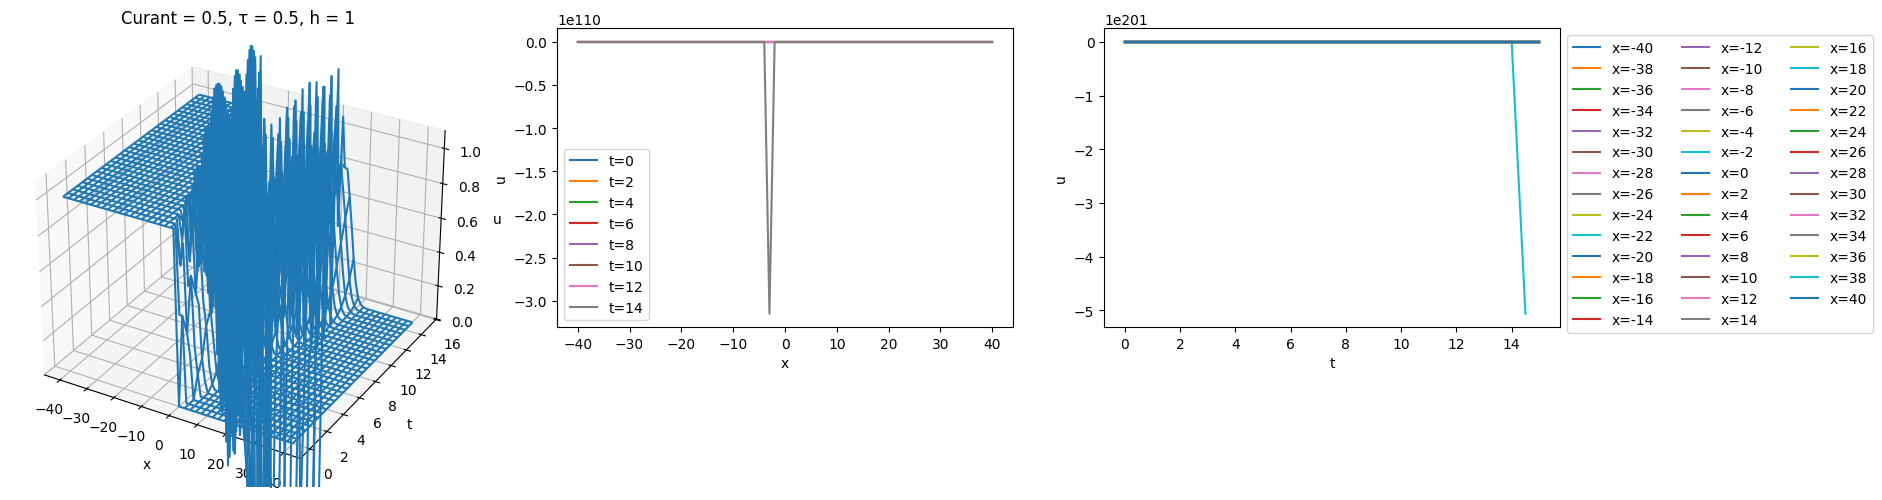

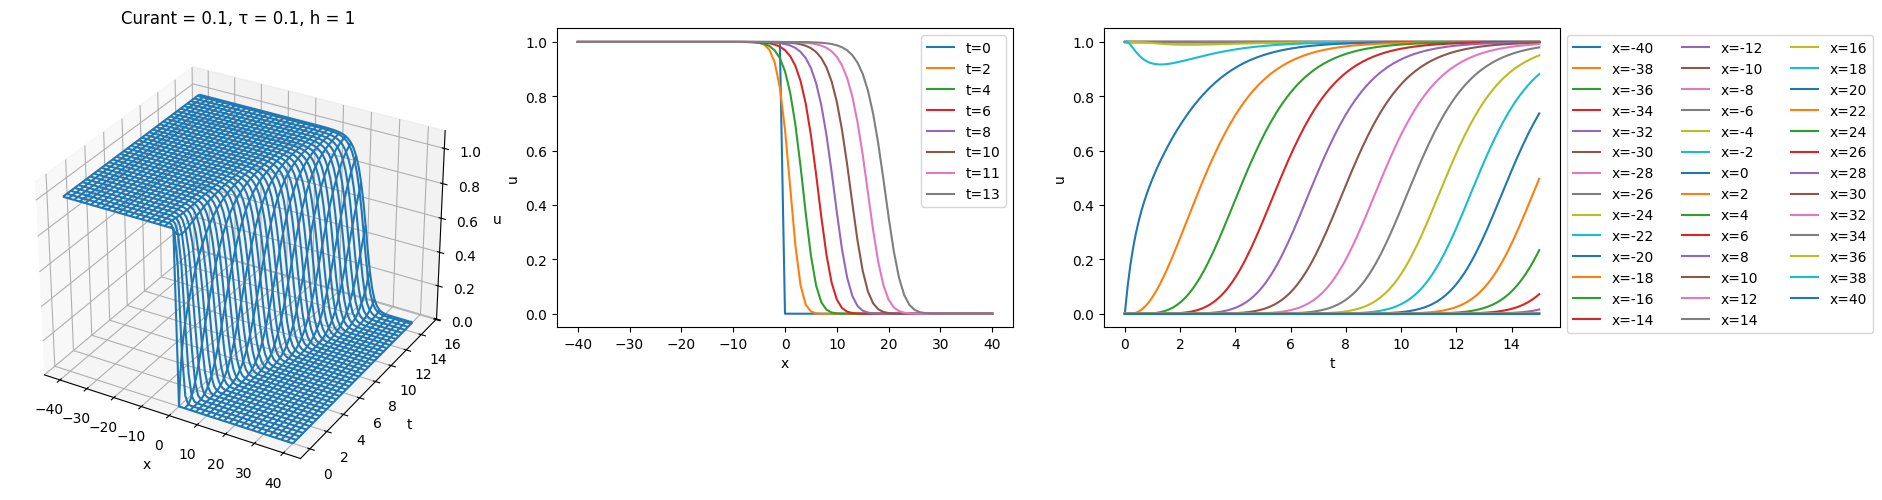

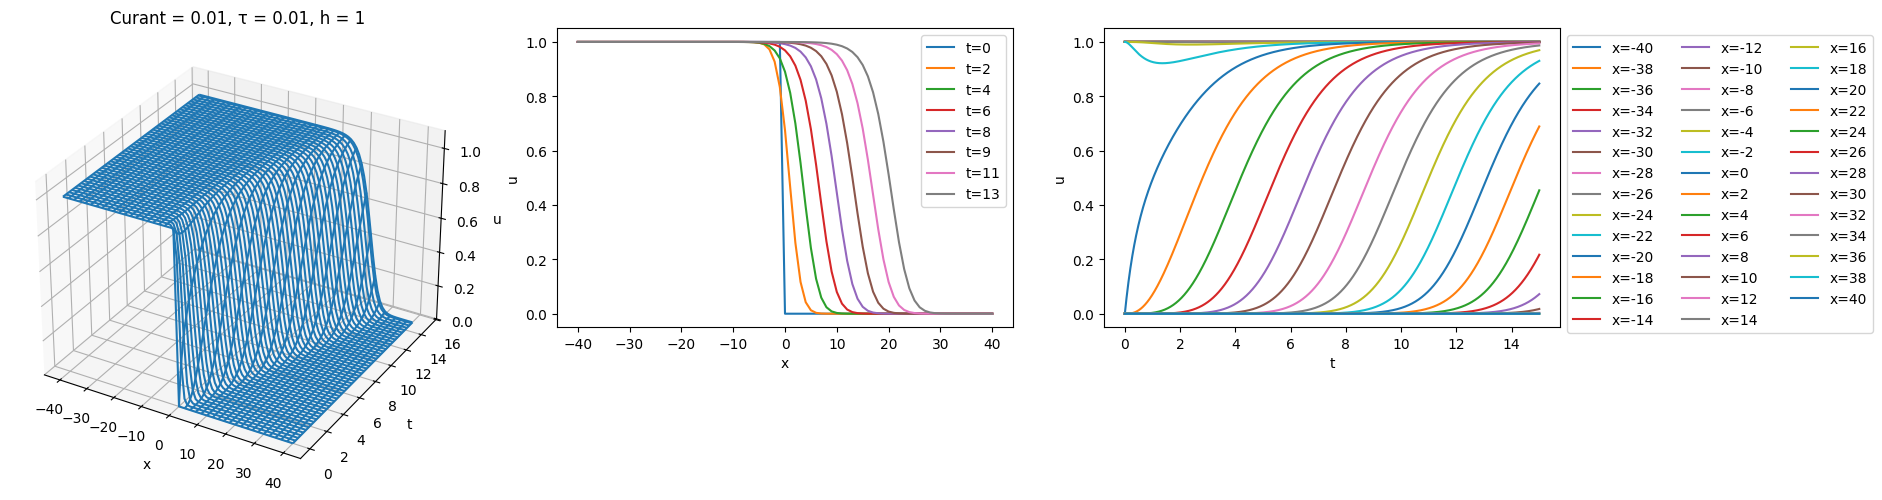

In [17]:
t, x, u, s = explicit(T=15, tau=0.5, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)
t, x, u, s = explicit(T=15, tau=0.1, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)
t, x, u, s = explicit(T=15, tau=0.01, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)

$\textbf{Метод расщепления по физическим процессам}$

Метод заключается в том, что мы рассматриваем по отдельности два физических процесса -- сначала эволюцию во времени, а затем координатную зависимость. В нашем случае уравнения переноса нелинейное слагаемое отвечает за изменение численности популяции, а слагаемое со второй производной -- за изменение положения отдельных особей. 
За каждый шаг разностной схемы мы проводим вычисления в два этапа. На первом этапе мы фиксируем координаты всех особей и решаем следующее уравнение:
$$\frac{du(t)}{dt} = au(t)(1-u(t))$$
На втором этапе мы знаем зависимость от времени, и находим координатную зависимость, то есть фиксируем численность особей и смотрим на изменение их координат. Этот этап сводится к решению уравнения:
$$\frac{du(t,x)}{dt} = \frac{d^2u(t,x)}{dx^2}$$
Если записать это в терминах разностной схемы, получим следующие уравнения:
$$\begin{cases}
\frac{u^{n+1/2}_{m} - u^{n}_{m}}{\tau} = au^{n}_{m}(1 - u^{n}_{m});\\
\frac{u^{n+1}_{m} - u^{n+1/2}_{m}}{\tau} = \frac{u^{n+1/2}_{m+1} - 2u^{n+1/2}_{m} + u^{n+1/2}_{m-1}}{h^2}.
\end{cases}$$

In [81]:
def grid_layer_count(old_grid, tau, h, u_left, u_right):
    N = np.size(old_grid, axis=0)
    grid = old_grid.copy()
    
    #граничные условия
    grid[0] = u_left
    grid[-1] = u_right
    
    #первый этап - изменение численности особей, координаты фиксированы
    for m in range(1, N-1):
        grid[m] += a * grid[m] * (1 - grid[m]) * tau
        
    #второй этап - изменение координат, численность фиксирована
    for m in range(1, N-1):
        grid[m] += tau / (h ** 2) * (grid[m+1] + grid[m-1] - 2 * grid[m])
        
    return grid

def explicit_split(T, tau, L_left, L_right, h, u_left=u_left, u_right=u_right, u0=u0):
    #реализация явной схемы с расщеплением
    
    s = f"Curant = {tau / h**2:.3f}, \u03c4 = {tau}, h = {h}"
    
    t = np.arange(0, T+tau, tau)
    x = np.arange(L_left, L_right+h, h)
    
    N = len(x)
    M = len(t)
    
    u = np.zeros(N*M).reshape(M, N)
    
    u[0] = u0(x)
    for n in range(1, M):
        u[n] = grid_layer_count(u[n-1], tau, h, u_left, u_right)
    
    return (t, x, u, s)

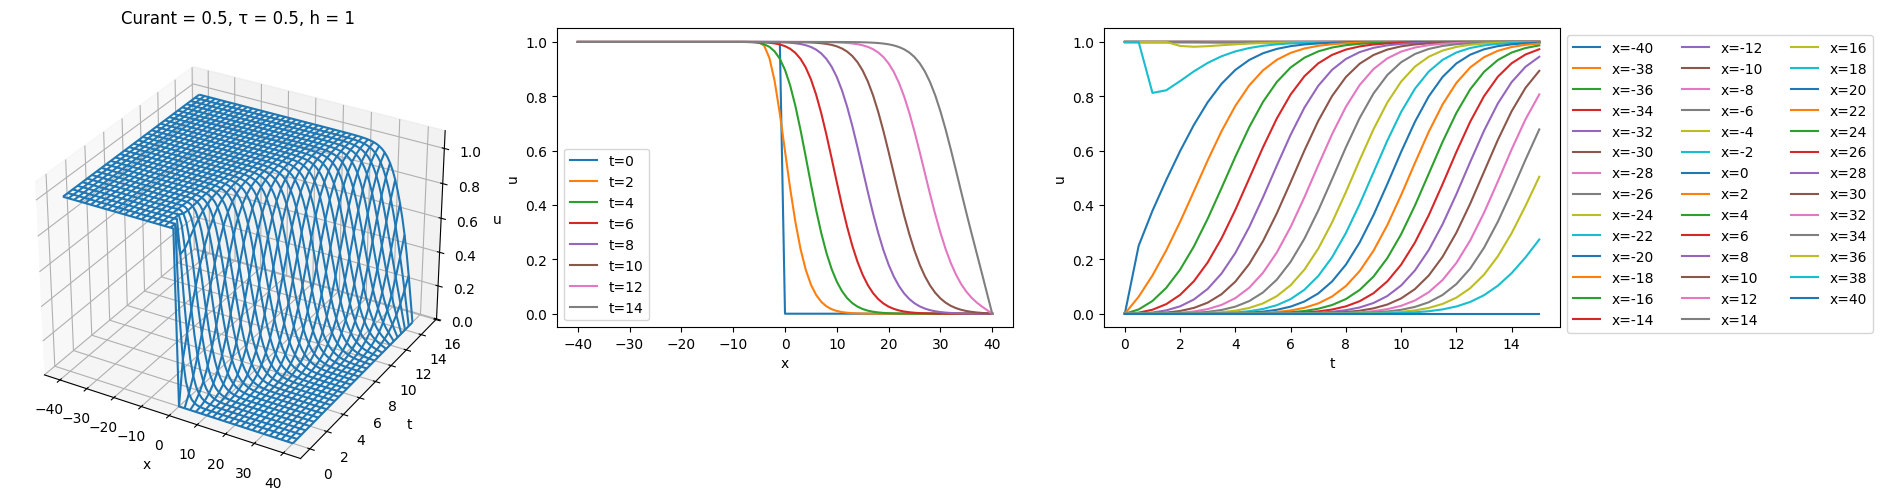

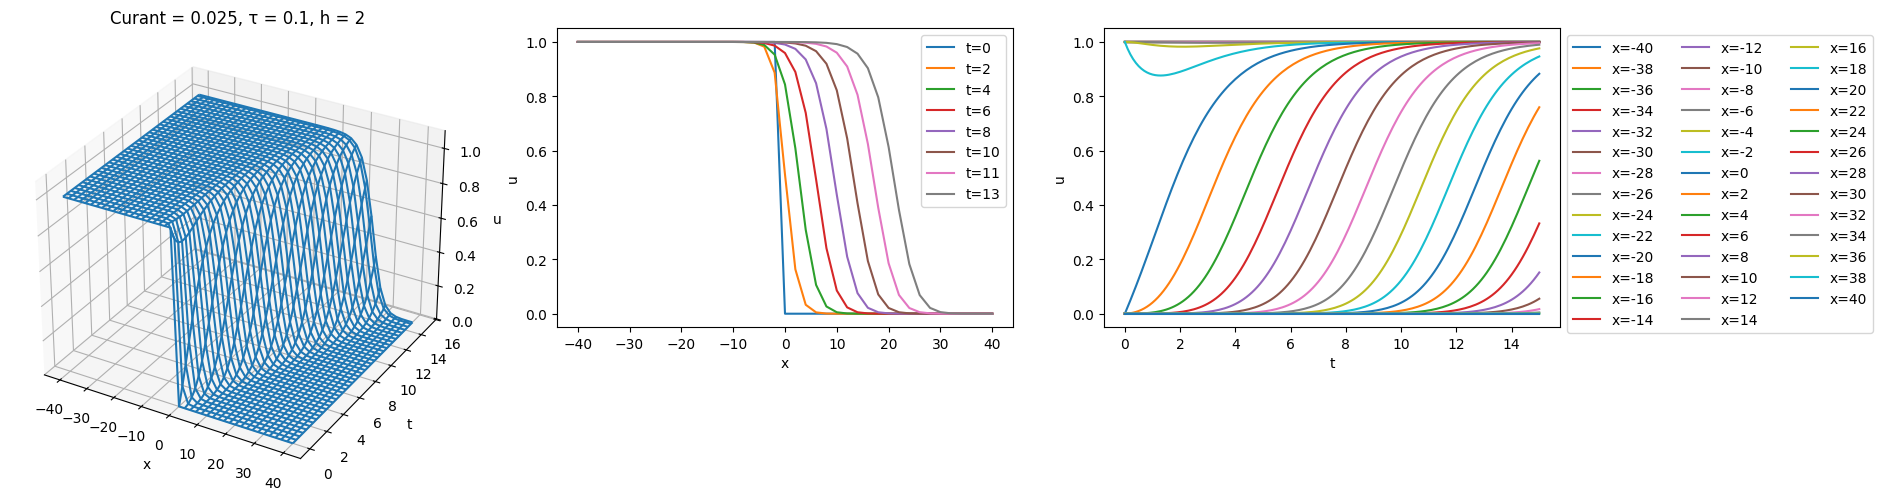

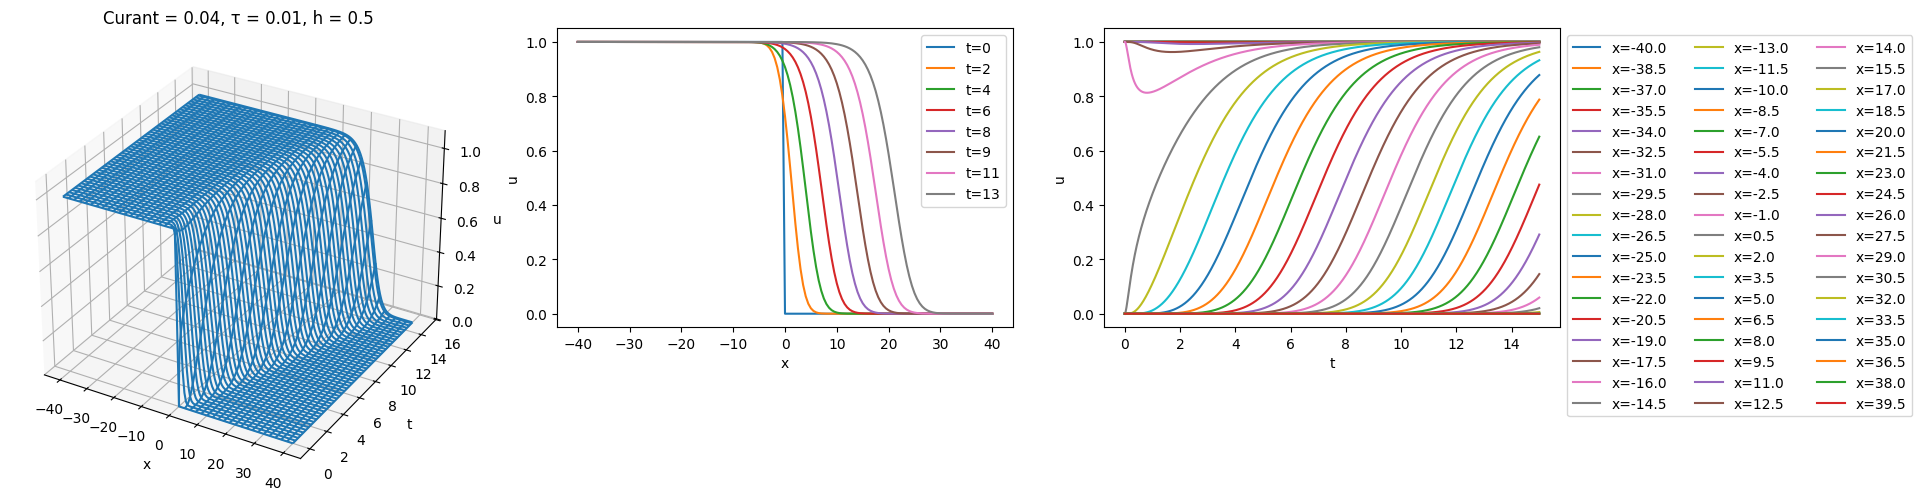

In [22]:
t, x, u, s = explicit_split(T=15, tau=0.5, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)
t, x, u, s = explicit_split(T=15, tau=0.1, L_left=-40, L_right=40, h=2)
u_plot(t, x, u, s)
t, x, u, s = explicit_split(T=15, tau=0.01, L_left=-40, L_right=40, h=0.5)
u_plot(t, x, u, s)

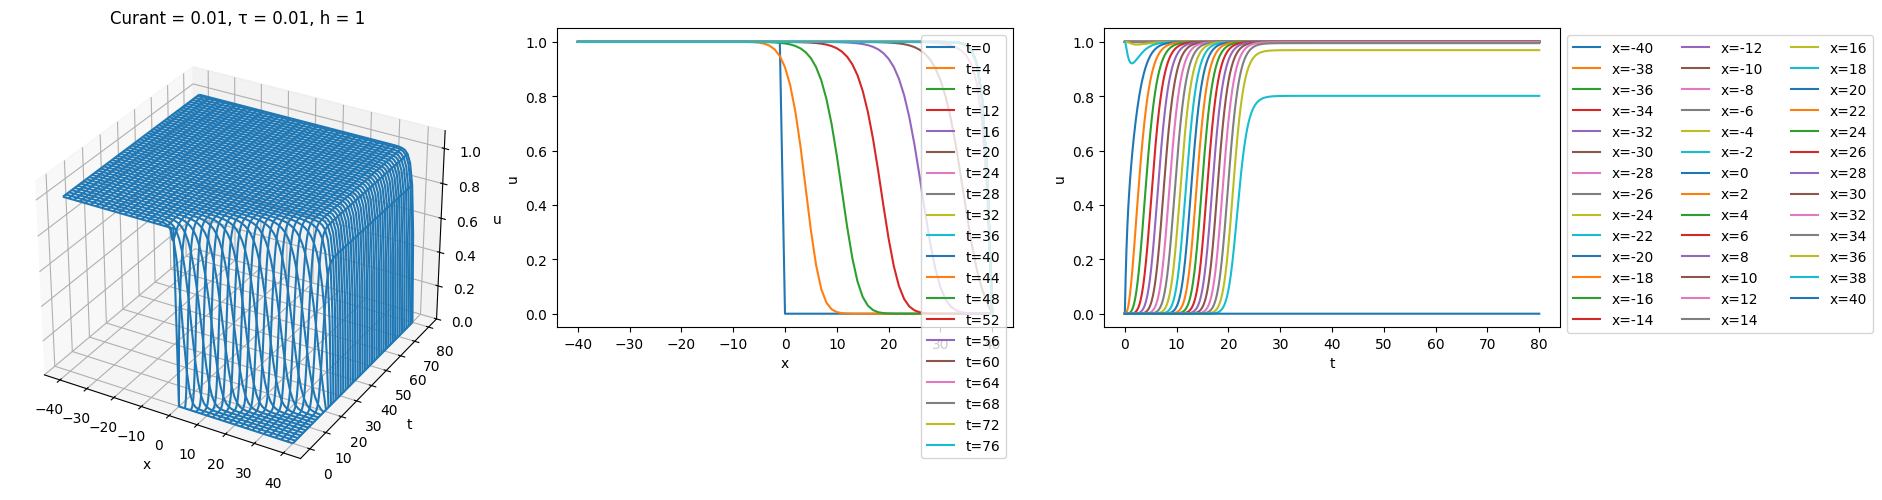

In [26]:
t, x, u, s = explicit_split(T=80, tau=0.01, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)

$\textbf{Схема Кранка-Николсона + расщепление}$

В задачах численного решения ДУЧП, кроме явных схем, применяются также и неявные схемы, где значения функции на новом слое выражены через значения в других соседних узлах неявно. Такие схемы, в отличие от явных, оказываются абсолютно устойчивыми (устойчивы независимо от входных параметров), но при этом требуют куда более затратных вычислений для реализации. Выходом из ситуации может стать расщепление по процессам, рассмотренное ранее - оно упрощает и расщепляет по переменным/процессам системы уравнений, что делает вычисления по неявным схемам менее затратными и сложными.

В нашей работе мы попробуем использовать неявную схему Кранка-Николсона вместе с расщеплением по физическим процессам. Суть метода заключается в том, что вместо $u^n_m$ мы будем подставлять в правую часть уравнения диффузии  $\frac{u^{n+1/2}_m + u^{n}_m}{2}$. Первое уравнение, описывающее процесс изменения численности популяции, нелинейное, поэтому мы не будем его затрагивать нашей схемой, а решим, как и ранее, явно.

Тогда получим следующие уравнения:
$$\begin{cases}
\frac{u^{n+1/2}_{m} - u^{n}_{m}}{\tau} = au^{n}_{m}(1 - u^{n}_{m});\\
\frac{u^{n+1}_{m} - u^{n+1/2}_{m}}{\tau} = \frac{(u^{n+1}_{m+1} - 2u^{n+1}_{m} + u^{n+1}_{m-1})+(u^{n+1/2}_{m+1} - 2u^{n+1/2}_{m} + u^{n+1/2}_{m-1})}{2h^2}.
\end{cases}$$

Для удобства записи второго уравнения можно ввести число Куранта $s = \frac{\tau}{2h^2}$. Хотя в случае неявной схемы этот параметр никак не влияет на её устойчивость (схема абсолютно устойчива), она позволяет привести его к более удобному для восприятия виду:
$$-su_{i+1}^{n+1}+(1+2s)u_{i}^{n+1}-su_{i-1}^{n+1}=su_{i+1}^{n+1/2}+(1-2s)u_{i}^{n+1/2}+su_{i-1}^{n+1/2}.$$

In [86]:
def modified_crank_nicolson(T, tau, L_left, L_right, h, u_left=u_left, u_right=u_right, u0=u0):
    
    st = f"\u03c4 = {tau}, h = {h}"
        
    t = np.arange(0, T+tau, tau)
    x = np.arange(L_left, L_right+h, h)
    
    N = len(x)
    M = len(t)
    u = np.zeros(N*M).reshape(M, N)
    
    # Число Куранта
    s = tau / (2 * h**2)
    
    u[0] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right
    
    # Матрицы для схемы Кранка-Никольсона
    A = np.zeros((N, N))
    B = np.zeros((N, N))
    
    for i in range(1, N-1):
        A[i, i-1] = -s
        A[i, i] = 1 + 2*s
        A[i, i+1] = -s
        
        B[i, i-1] = s
        B[i, i] = 1 - 2*s
        B[i, i+1] = s
        
    A[0, 0] = 1
    A[-1, -1] = 1
    B[0, 0] = 1
    B[-1, -1] = 1
    
    # Решаем на каждом временном шаге
    for m in range(1, M):
        #первый этап - изменение численности особей, координаты фиксированы
        u[m] = u[m-1] + a * u[m-1] * (1 - u[m-1]) * tau
        
        #второй этап - изменение координат, численность фиксирована
        b = B @ u[m].T
        u[m] = np.linalg.solve(A, b).T
    
    return t, x, u, st

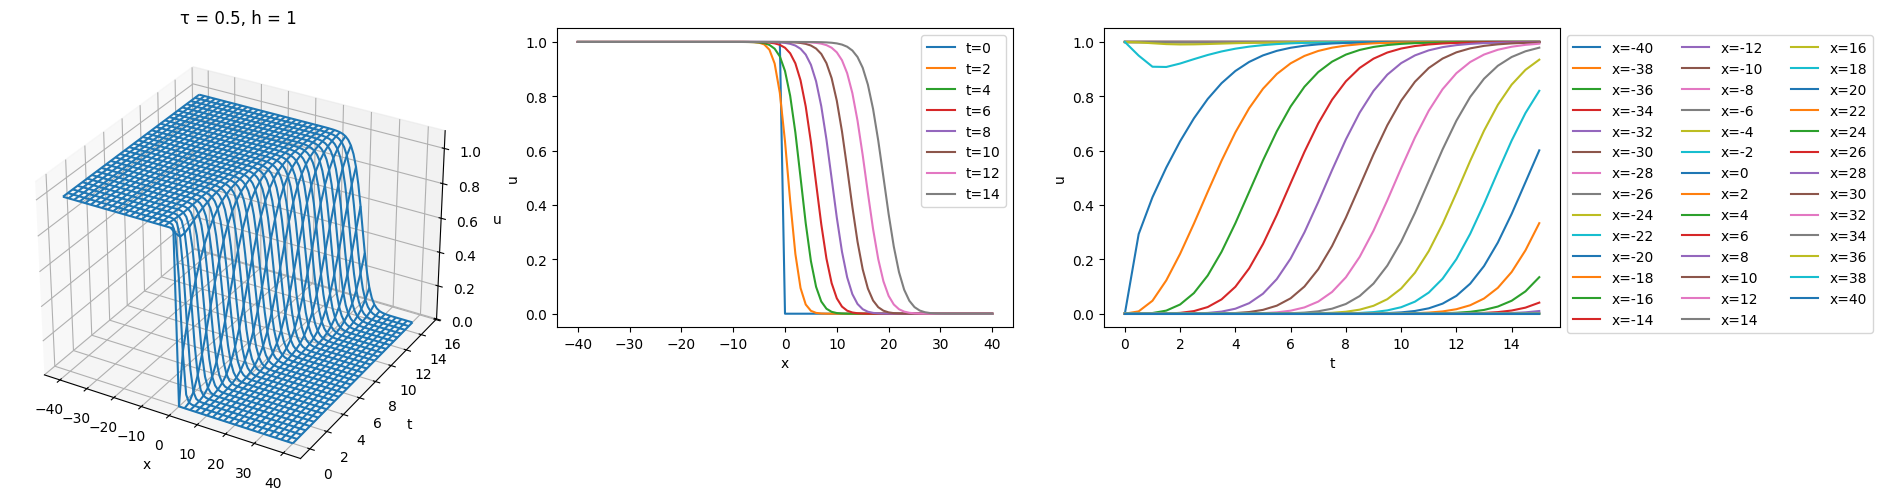

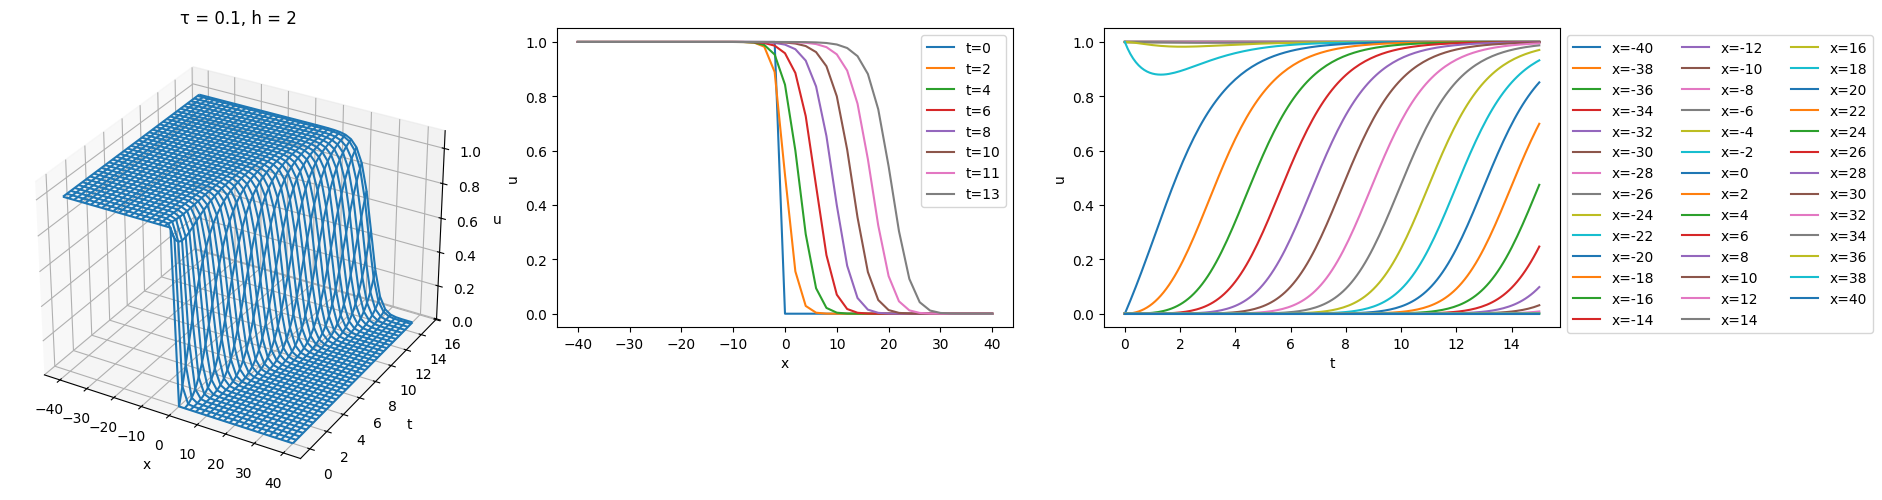

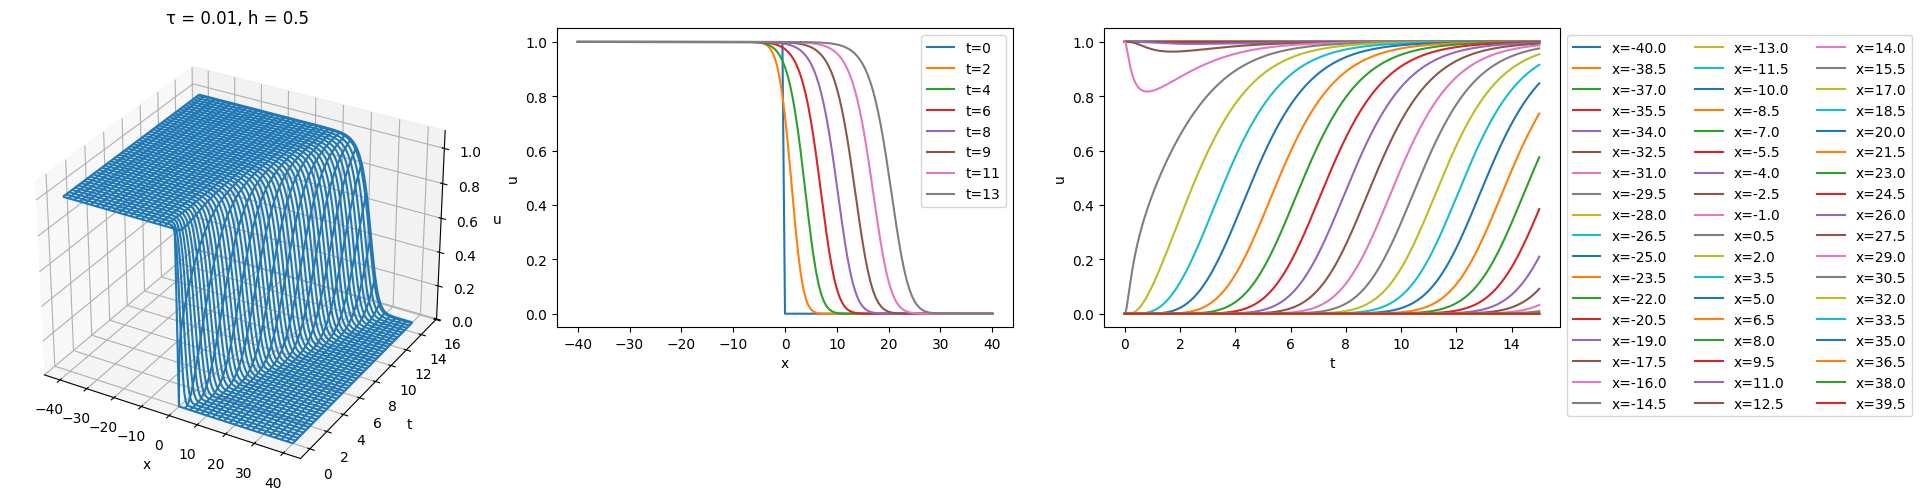

In [29]:
t, x, u, s = modified_crank_nicolson(T=15, tau=0.5, L_left=-40, L_right=40, h=1)
u_plot(t, x, u, s)
t, x, u, s = modified_crank_nicolson(T=15, tau=0.1, L_left=-40, L_right=40, h=2)
u_plot(t, x, u, s)
t, x, u, s = modified_crank_nicolson(T=15, tau=0.01, L_left=-40, L_right=40, h=0.5)
u_plot(t, x, u, s)

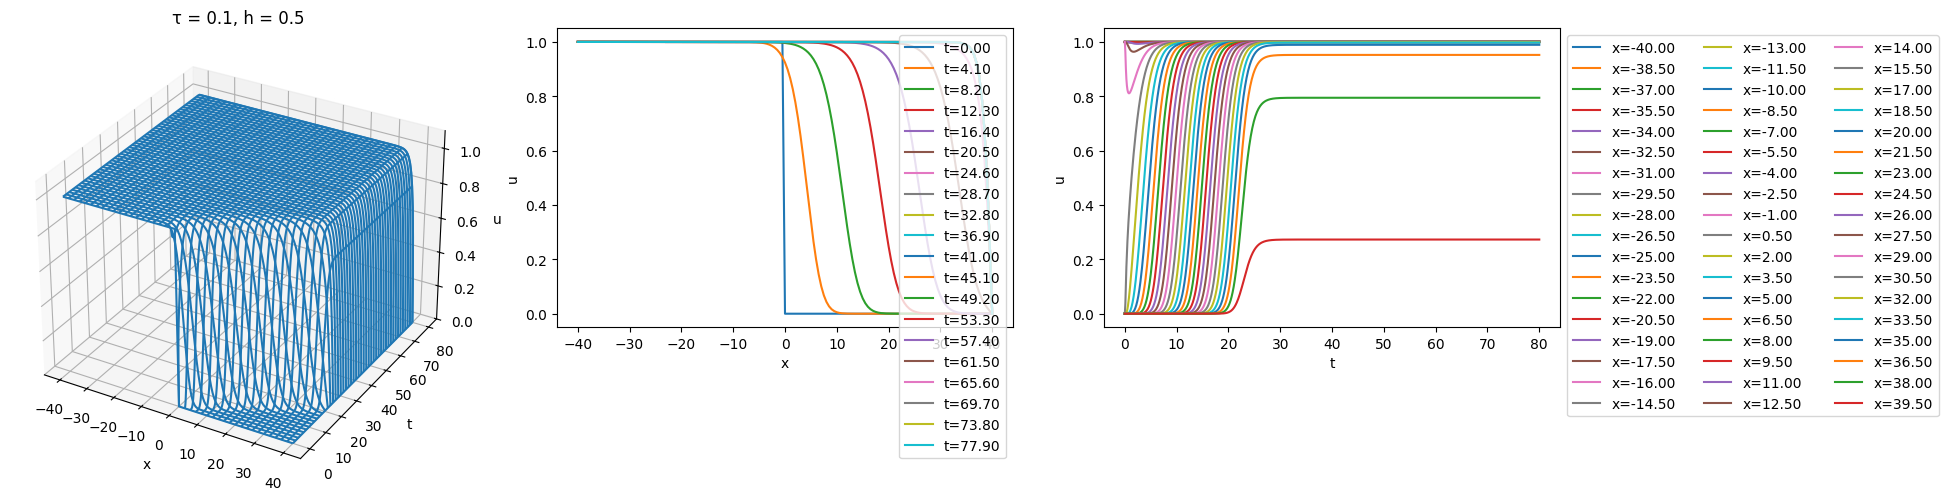

In [87]:
t, x, u, s = modified_crank_nicolson(T=80, tau=0.1, L_left=-40, L_right=40, h=0.5)
u_plot(t, x, u, s)

$\textbf{Сравнение методов}$

In [102]:
def comp(*methods):
    p_ks=scipy.interpolate.interp1d(u_ksi, -np.array(p_ksi), fill_value = 'extrapolate')
    H = [1.5, 1, 0.5, 0.25]
    tau = 0.01
    for method in methods:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
        ax1.plot(u_ksi, -np.array(p_ksi), color = "black", label = "run wave")
        
        for h in H:
            t, x, u, s = method(T=30, tau=tau, L_left=-80, L_right=80, h=h)
            u_t=scipy.interpolate.interp1d(x, u[-1], fill_value = 'extrapolate')

            #фазовый портрет
            p = np.array([scipy.misc.derivative(u_t, x0, dx = 0.2, order = 3) for x0 in x])
            ax1.plot(u_t(x), p, label = "tau="+str(tau)+", h="+str(h) +", K="+str(round(tau/h, 3)))
            #невязка решений
            ax2.plot(u_t(x), np.abs(p-p_ks(u_t(x))), label = "tau="+str(tau)+", h="+str(h) +", K="+str(round(tau/h, 3)))
                     
        ax1.legend()
        ax2.legend()
        ax1.set_xlabel("u")
        ax1.set_ylabel("p")
        ax1.set_title("Фазовая плоскость")
        ax2.set_title("Невязка численного решения по сравнению с решением в переменных бегущей волны")
        ax2.set_xlabel("u")
        ax2.set_ylabel("$|p_{calc}-p_{run}|$")

Явная схема


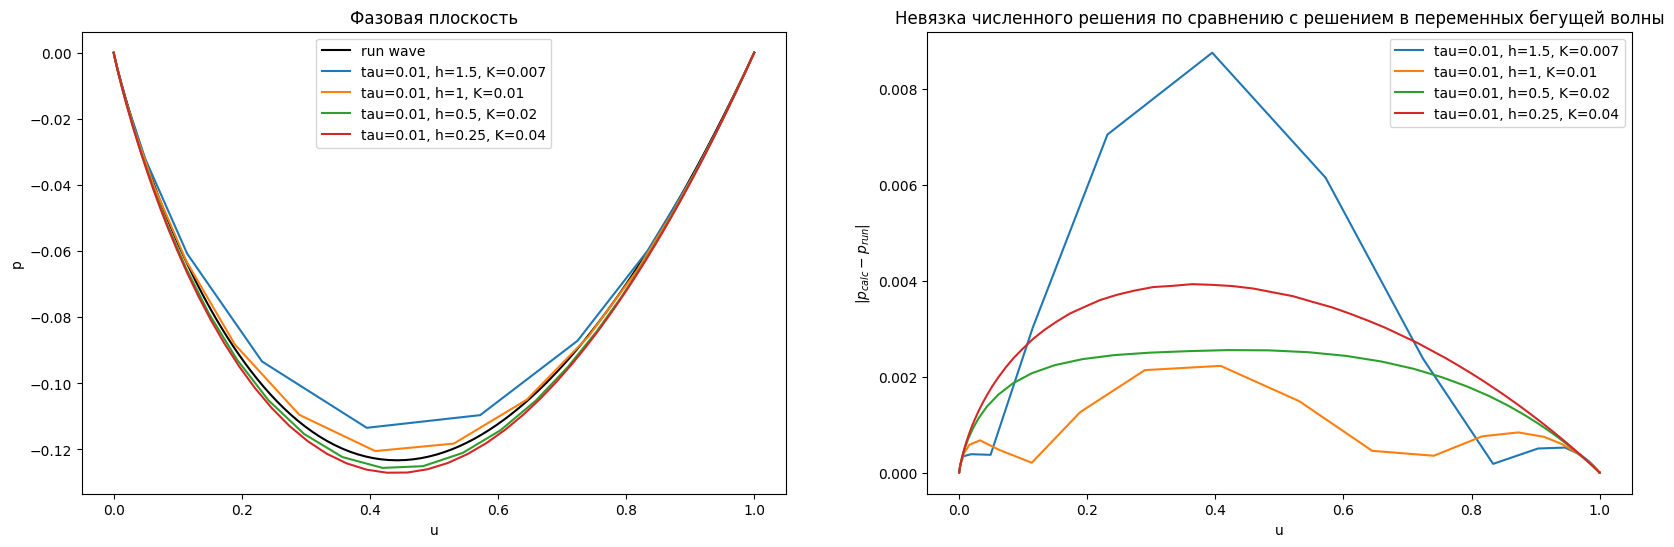

In [103]:
print("Явная схема")
comp(explicit)

Явная схема с расщеплением


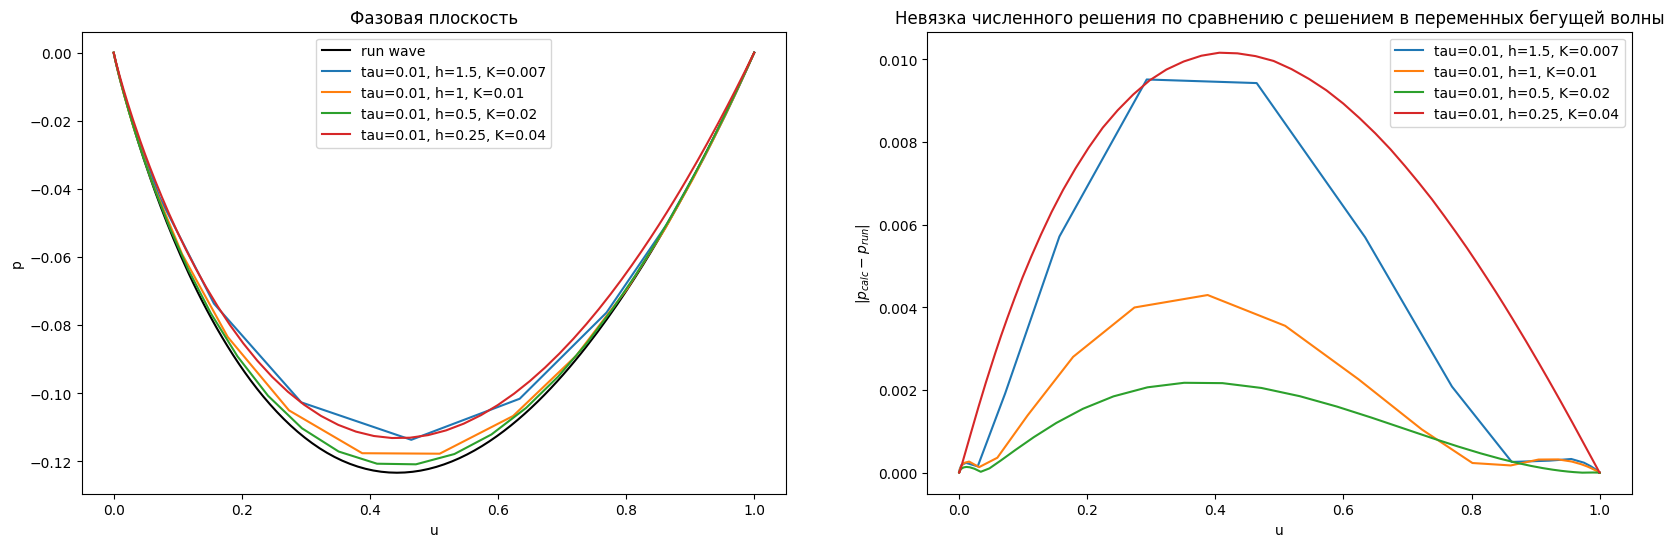

In [104]:
print("Явная схема с расщеплением")
comp(explicit_split)

Схема Кранка-Николсона с расщеплением


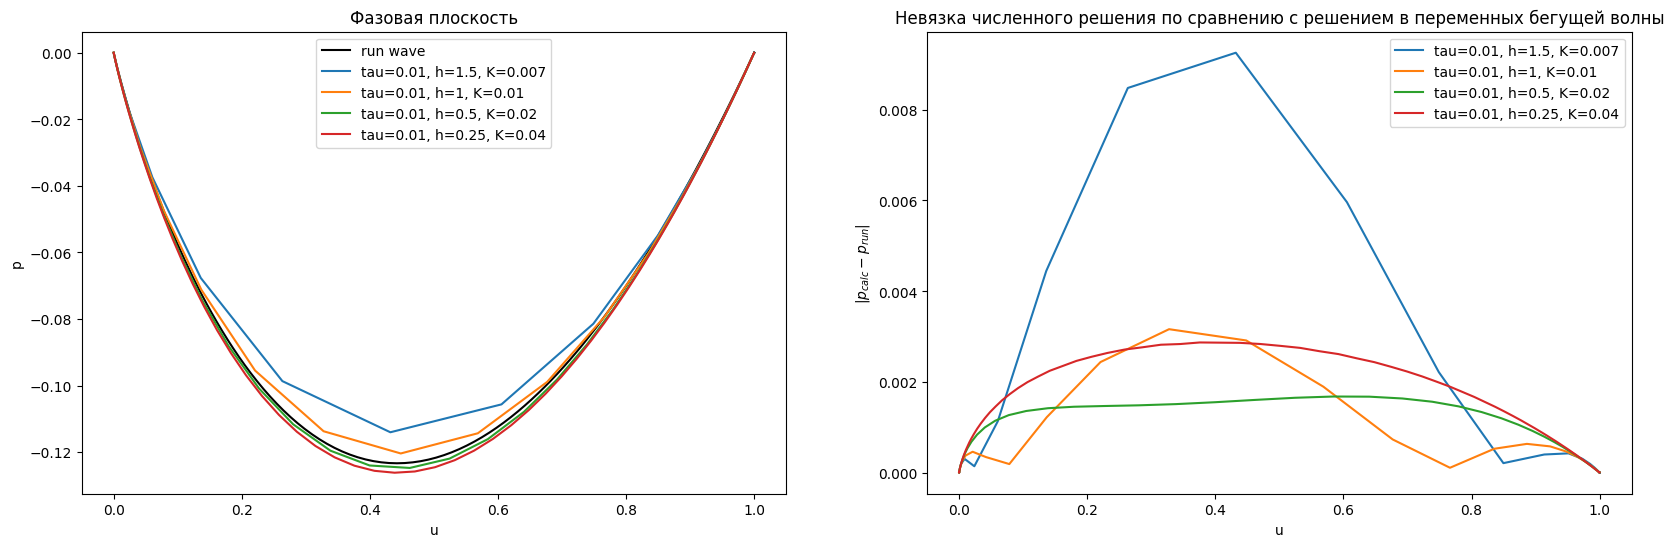

In [107]:
print("Схема Кранка-Николсона с расщеплением")
comp(modified_crank_nicolson)

Как видим, наилучшие показатели у схемы Кранка-Николсона с расщеплением, однако стоит отметить, что её исполнение заняло у компьютера ощутимо больше времени, чем в случае с явными схемами, а выигрыш в точности не повысил её порядок, дав разницу лишь в 2-4 раза. 

Явная схема с расщеплением лишь ухудшила результат по сравнению с обычной явной схемой, поэтому этот метод лучше применять для более затратных и точных неявных схем, чтобы повысить их быстродействие. 

Также стоит отметить, что в наших вычислениях есть систематическая ошибка, связанная с тем, что мы, в отличие от исходной задачи, рассматриваем решение не на всей плоскости, а в ограниченной по времени и пространству области. Вероятно, поэтому при уменьшении $h$ в конце вычислений на красной кривой мы получаем результаты хуже, чем на зелёной, хоть шаг $h$ для первой кривой и меньше.